# Example 5-3: Estimation of acceleration spectra

This example shows the analysis of a time series of accelerations on the Hardanger bridge under excitation from winds.



## Import the data

The 10 minutes of data is contained within a txt file. It's always sensible to plot (at least some of) the data to ensure it is correct.


[[-0.0145275  -0.01474755 -0.01456486 -0.01459142 -0.0144917  -0.01467065
  -0.01435894 -0.01420586 -0.01448238 -0.0147523 ]
 [ 0.01030381  0.00989947  0.00915237  0.00896942  0.00862385  0.00905921
   0.0088705   0.00925469  0.00948824  0.00998183]
 [-0.03008688 -0.03332086 -0.03484968 -0.03435206 -0.03364352 -0.03457991
  -0.03329645 -0.02707312 -0.02508411 -0.02664545]]


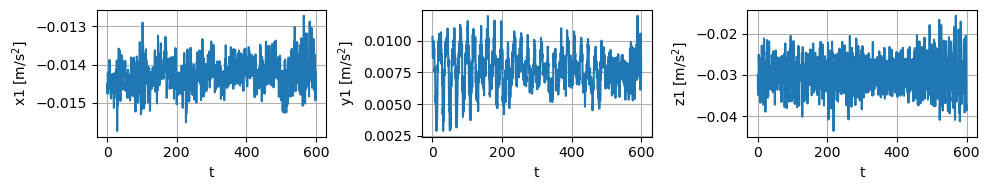

In [76]:
# Import and plot time series

import numpy as np
from matplotlib import pyplot as plt
from scipy import interpolate
from scipy import signal as spsi

# Import data x1, y1, and z1
y_labels=np.loadtxt('data/acc_data.txt',delimiter=',',skiprows=0, max_rows=1, dtype=str, usecols=[0,1,2]) 

y=np.loadtxt('data/acc_data.txt',delimiter=',',skiprows=1, usecols=[0,1,2]).T

fs=3 # sample rate is 3 Hz
dt=1/fs

print(y[:,0:10]) # Print first ten rows of data file

t=np.arange(0,a.shape[0]*dt,dt) # make time vector

# Plot time series
fig, axs = plt.subplots(1,3,figsize=(10,2))    
for k1 in range(3):
        ax = axs[k1]
        ax.plot(t,a[:,k1])
        ax.set_ylabel(y_labels[k1] + ' [m/s$^2$]')
        ax.set_xlabel('t')
        ax.grid(True)
        #ax.set_xlim(0,60)
plt.tight_layout()


## Welch estimate of cross-specral density

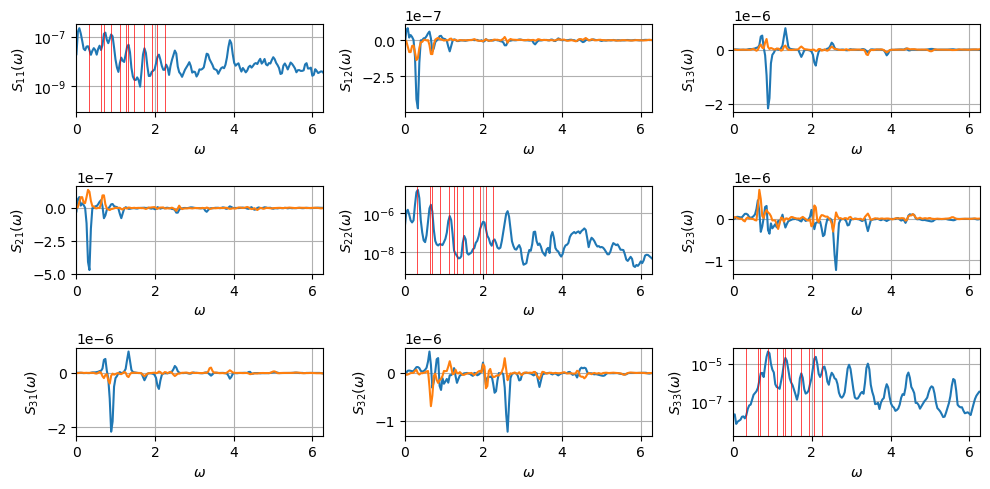

In [74]:
# Welch estimate of cross-spectral density

import scipy

Ndivisions=5 # Number of divisions of the time series
Nwindow=np.ceil(len(t)/Ndivisions) # Length of window
Nfft_pow2 = 2**(np.ceil(np.log2(Nwindow))) # Next power of 2

# Spectral matrix
S_welch=np.zeros((4,4,np.int32(Nfft_pow2/2+1)),dtype=np.complex_)

# Fill spectral matrix by taking the cross spectral density between each of the 3 time series
for k1 in range(3):
    for k2 in range(3):
            f, S_Hz=scipy.signal.csd(y[k1,:],y[k2,:], fs=1/dt, window='hann', nperseg=Nwindow, noverlap=None, nfft=Nfft_pow2, detrend='constant', return_onesided=True, scaling='density', axis=-1, average='mean')
            
            w_welch=f*2*np.pi # Frequency axis in rad/s
            S_welch[k1,k2,:]=S_Hz/(2*np.pi) # Spectrum in rad/s
            
# Plot spectrum
fig, axs = plt.subplots(3,3,figsize=(10,5))    
for k1 in range(3):
    for k2 in range(3):
        ax = axs[k1,k2]
        ax.plot(w_welch,np.real(S_welch[k1,k2,:]))
        ax.plot(w_welch,np.imag(S_welch[k1,k2,:]))
        ax.set_ylabel(('$S_{' + str(k1+1) + str(k2+1) + '}(\omega)$'))
        ax.set_xlabel('$\omega$')
        ax.grid(True)
        
        if k1==k2:
            ax.set_yscale('log')
        ax.set_xlim(0,1*2*np.pi)
plt.tight_layout()


fn_model=np.array([0.051,0.101,0.110,0.141,0.177,0.200,0.210,0.234,0.274,0.306,0.328,0.358]) # frequencies from fe model

# Plot frequencies in spectrum
for k1 in range(3):
        ax = axs[k1,k1]
        for n in range(len(fn_model)):
            ax.axvline(fn_model[n]*2*np.pi,color ='r',linewidth=0.5)

